```Table of Contents¶
Getting familiar with our data

Data types and data completeness
Feature engineering
Statistical summary
Handling outliers
Handling missing values
Visual Exploratory Data Analysis

Diploma distribution by income level
Average income by diploma
Spending by Income
Diploma distribution by marital situation
Income level by parental status
Statistical Hypothesis Testing

Test for normality
Graphical Method : Histogram plot
Statistical Method : Shapiro test
Rank Significance Tests
Numerical variables : Mann-Whitney's test
Rank Correlation Tests
Numerical variables : Spearman test
Categorical variables : Chi-square test```


In [1]:
import os
from datetime import datetime

import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio


from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer



pio.templates.default = "plotly_dark"
plt.style.use('dark_background')

In [2]:
print(os.getcwd())
print(os.listdir())

c:\Users\e186837\OneDrive - Applied Materials\AMAT_courses\AMAT_SY\Scaler\ML_DL\hypothesis_testing
['4.2.0', 'Hypo_frame.ipynb', 'marketing_data.csv']


In [3]:
path = r"C:\Users\e186837\OneDrive - Applied Materials\AMAT_courses\AMAT_SY\Scaler\ML_DL\hypothesis_testing\marketing_data.csv"
df = pd.read_csv(path)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

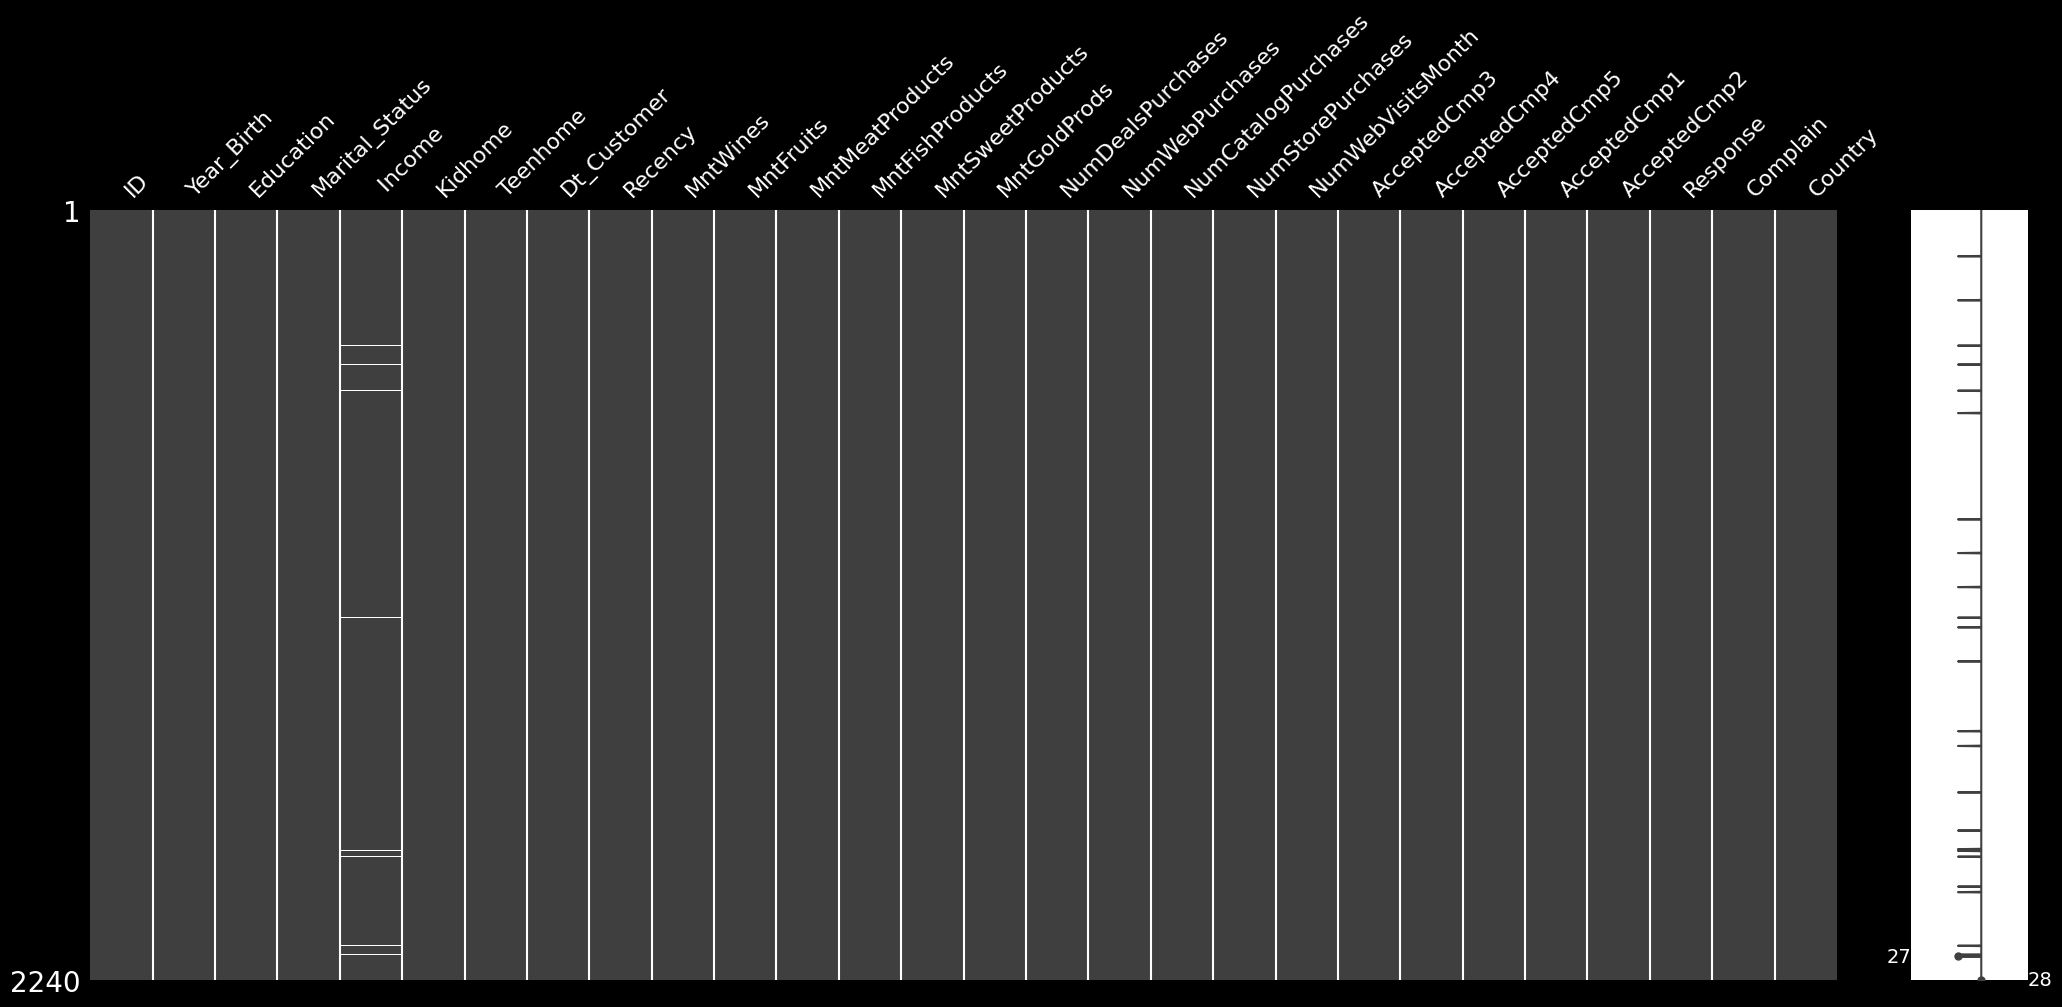

In [5]:
msno.matrix(df)
plt.show()

In [6]:
missing_values = df.isnull().sum()
missing_values.loc[missing_values != 0]

Income     24
dtype: int64

In [7]:
df.rename(columns = {' Income ':'Income'}, inplace = True)

In [8]:
df['Income'] = df['Income'].str.replace("$", "").str.replace(",", "").astype("float")
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [9]:
## lets look at what the data looks like after above operations
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [10]:
df['age'] = datetime.now().year - df['Year_Birth']
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,0,1,0,SP,54,1190
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,0,1,1,0,CA,63,577
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,0,US,66,251
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,0,0,AUS,57,11
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,1,0,0,0,0,1,0,SP,35,91


In [12]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [13]:
df['Marital_Situation'] = df['Marital_Status'].replace({
                            'Divorced': 'Alone',
                            'Single' : 'Alone',
                            'Married' : 'Couple',
                            'Together': 'Couple',
                            'Absurd': 'Alone',
                            'Widow' : 'Alone',
                            'YOLO': 'Alone',
})

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Spending,Marital_Situation
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,1,0,SP,54,1190,Alone
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,1,1,0,CA,63,577,Alone
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,US,66,251,Couple
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,0,AUS,57,11,Couple
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,0,0,1,0,SP,35,91,Alone


In [15]:
df['Marital_Situation'].unique()

array(['Alone', 'Couple'], dtype=object)

In [16]:
df['Has_child'] = np.where((df['Kidhome'] + df['Teenhome'] > 0), 'Yes', 'No')

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Spending,Marital_Situation,Has_child
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,1,0,SP,54,1190,Alone,No
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,1,1,0,CA,63,577,Alone,No
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,US,66,251,Couple,Yes
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,AUS,57,11,Couple,Yes
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,0,1,0,SP,35,91,Alone,Yes


In [18]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [19]:
df['Educational_years'] = df['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})
df=df[['age','Income','Spending','Marital_Situation','Has_child','Educational_years', 'Education']]


C:\Users\e186837\AppData\Local\Temp\ipykernel_24768\1612023073.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Educational_years'] = df['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})


In [20]:
df

,age,Income,Spending,Marital_Situation,Has_child,Educational_years,Education
0,54,84835.0,1190,Alone,No,12,Graduation
1,63,57091.0,577,Alone,No,12,Graduation
2,66,67267.0,251,Couple,Yes,12,Graduation
3,57,32474.0,11,Couple,Yes,12,Graduation
4,35,21474.0,91,Alone,Yes,12,Graduation
...,...,...,...,...,...,...,...
2235,48,66476.0,689,Alone,Yes,21,PhD
2236,47,31056.0,55,Couple,Yes,8,2n Cycle
2237,48,46310.0,309,Alone,Yes,12,Graduation
2238,46,65819.0,1383,Couple,No,12,Graduation


In [21]:
df.describe()

,age,Income,Spending,Educational_years
count,2240.000000,2216.000000,2240.000000,2240.000000
mean,55.194196,52247.251354,605.798214,14.412500
std,11.984069,25173.076661,602.249288,4.510068
min,28.000000,1730.000000,5.000000,5.000000
25%,47.000000,35303.000000,68.750000,12.000000
50%,54.000000,51381.500000,396.000000,12.000000
75%,65.000000,68522.000000,1045.500000,18.000000
max,131.000000,666666.000000,2525.000000,21.000000


#### 1. The average age is 55, median is 54, and the 75 ptile is 65 -> shows a right skewed distribution
#### 2. mean education years is 14 -> bachelors
#### 3. THe income feature is also right skewed

In [22]:
df_1 = pd.DataFrame(data = df, columns = ['age', 'Income', 'Spending', 'Educational_years'])
df_1.head()

,age,Income,Spending,Educational_years
0,54,84835.0,1190,12
1,63,57091.0,577,12
2,66,67267.0,251,12
3,57,32474.0,11,12
4,35,21474.0,91,12


In [23]:
print(df_1.describe().loc['count'].sum(), len(pd.melt(df_1, value_vars = df_1)))
print('confirming number of rows, are the lens equal ? -> ', len(pd.melt(df_1, value_vars = df_1)) == df_1.describe().loc['count'].sum())

8936.0 8960
confirming number of rows, are the lens equal ? ->  False


In [24]:
df_num = pd.melt(df_1, value_vars = df_1 )
df_num


,variable,value
0,age,54.0
1,age,63.0
2,age,66.0
3,age,57.0
4,age,35.0
...,...,...
8955,Educational_years,21.0
8956,Educational_years,8.0
8957,Educational_years,12.0
8958,Educational_years,12.0


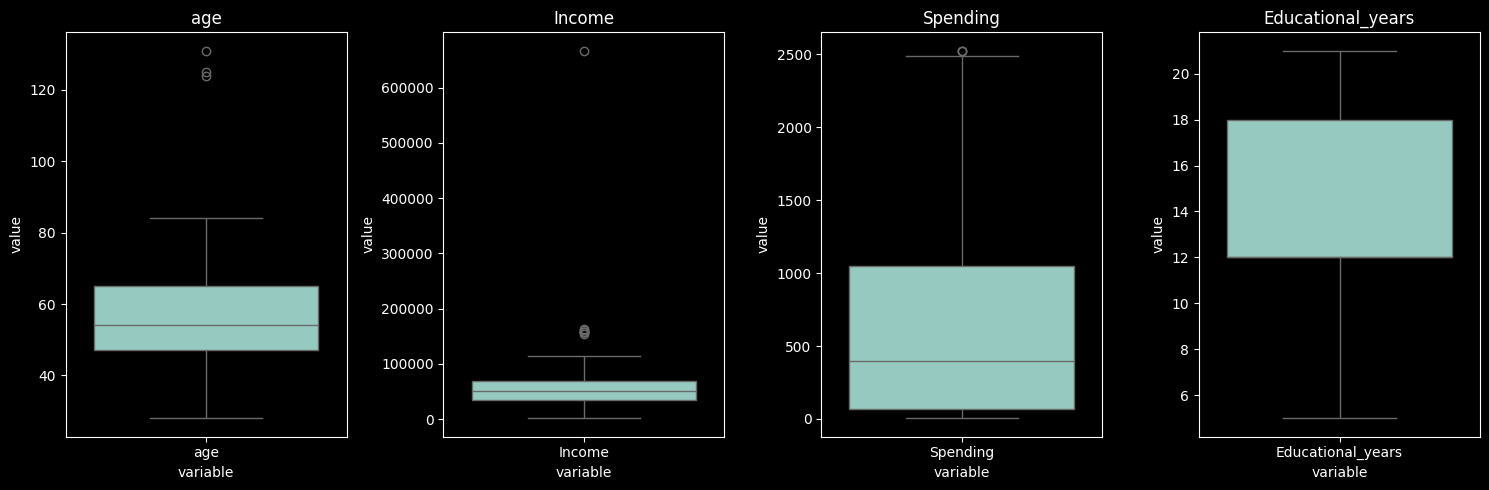

In [25]:
fig, axes = plt.subplots(1, len(df_num['variable'].unique()), figsize=(15, 5))

for i, var in enumerate(df_num['variable'].unique()):
    sns.boxplot(data=df_num[df_num['variable'] == var], x='variable', y='value', ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

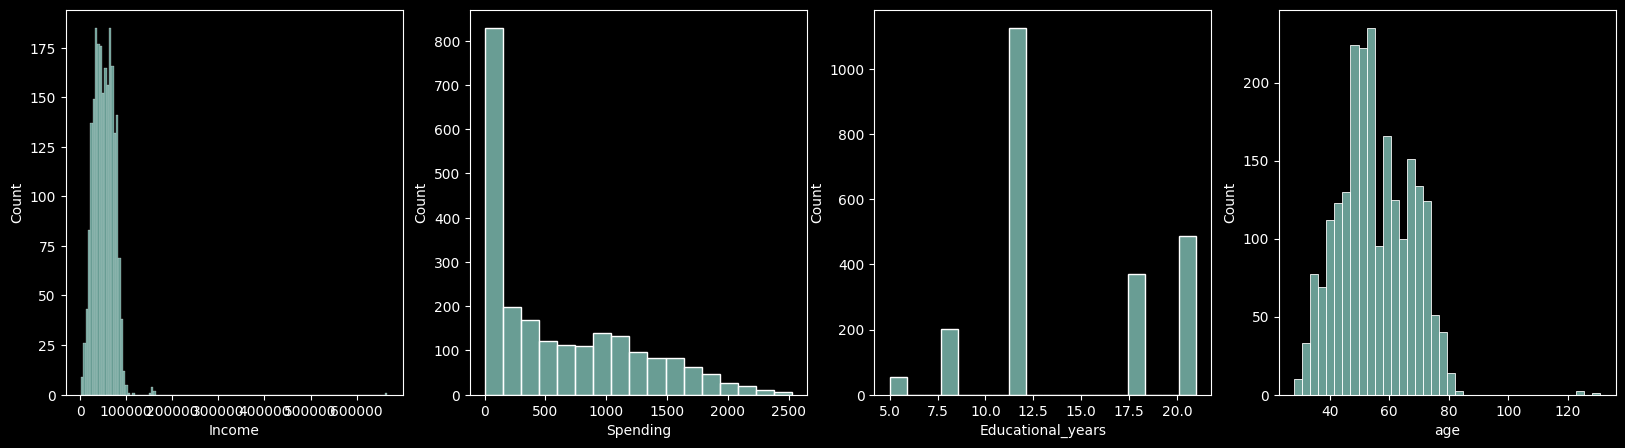

In [26]:
fig, axes = plt.subplots(1, len(df_1.columns), figsize = (20,5))
for i, var in enumerate(df_1.columns):
    sns.histplot(data = df_1, x = var)
    plt.subplot(1, len(df_1.columns), i+1)

<Axes: ylabel='Income'>

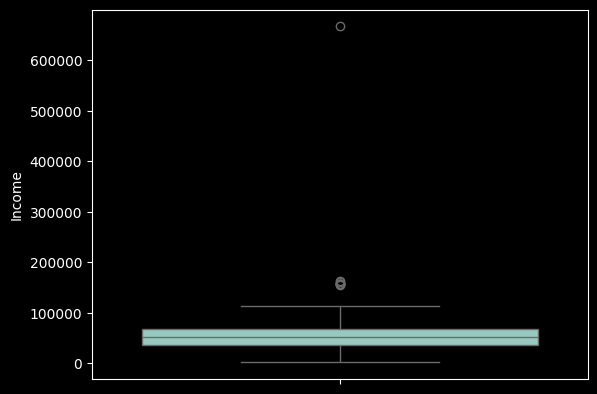

In [27]:
sns.boxplot(data = df_1, y = 'Income' )

#### There are hgih income people above 700k a year
#### however, the store caters to the low income group people majorly, so we will remove the high income people from here


### there are 2 ways to indetify the ouliers - 1. graphical methods, 2. statistical methods

In [28]:
df_1_melt = df_1.melt()
df_1_melt


,variable,value
0,age,54.0
1,age,63.0
2,age,66.0
3,age,57.0
4,age,35.0
...,...,...
8955,Educational_years,21.0
8956,Educational_years,8.0
8957,Educational_years,12.0
8958,Educational_years,12.0


In [29]:
fig = px.box(df_1_melt, y="value", facet_col="variable", facet_col_wrap = 2, boxmode="overlay", color="variable",  height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.show()

###### handling outliers here

In [30]:
df = df.drop(df[df['Income'] > 600000].index).reset_index(drop = True)
df.shape

(2239, 7)

In [31]:
df

,age,Income,Spending,Marital_Situation,Has_child,Educational_years,Education
0,54,84835.0,1190,Alone,No,12,Graduation
1,63,57091.0,577,Alone,No,12,Graduation
2,66,67267.0,251,Couple,Yes,12,Graduation
3,57,32474.0,11,Couple,Yes,12,Graduation
4,35,21474.0,91,Alone,Yes,12,Graduation
...,...,...,...,...,...,...,...
2234,48,66476.0,689,Alone,Yes,21,PhD
2235,47,31056.0,55,Couple,Yes,8,2n Cycle
2236,48,46310.0,309,Alone,Yes,12,Graduation
2237,46,65819.0,1383,Couple,No,12,Graduation


In [32]:
imputer = KNNImputer(n_neighbors= 5, metric='nan_euclidean')
imputer.fit(df[['Income', 'age' ,'Educational_years']])
X = imputer.transform(df[['Income', 'age' ,'Educational_years']])
Income_imputed = pd.DataFrame(X, columns = ['Income', 'age' ,'Educational_years'])
df['Income'] = Income_imputed['Income'].reset_index(drop = True)
count_nan = len(df) - df.count()
print(count_nan)


age                  0
Income               0
Spending             0
Marital_Situation    0
Has_child            0
Educational_years    0
Education            0
dtype: int64


In [33]:
df

,age,Income,Spending,Marital_Situation,Has_child,Educational_years,Education
0,54,84835.0,1190,Alone,No,12,Graduation
1,63,57091.0,577,Alone,No,12,Graduation
2,66,67267.0,251,Couple,Yes,12,Graduation
3,57,32474.0,11,Couple,Yes,12,Graduation
4,35,21474.0,91,Alone,Yes,12,Graduation
...,...,...,...,...,...,...,...
2234,48,66476.0,689,Alone,Yes,21,PhD
2235,47,31056.0,55,Couple,Yes,8,2n Cycle
2236,48,46310.0,309,Alone,Yes,12,Graduation
2237,46,65819.0,1383,Couple,No,12,Graduation


<Axes: >

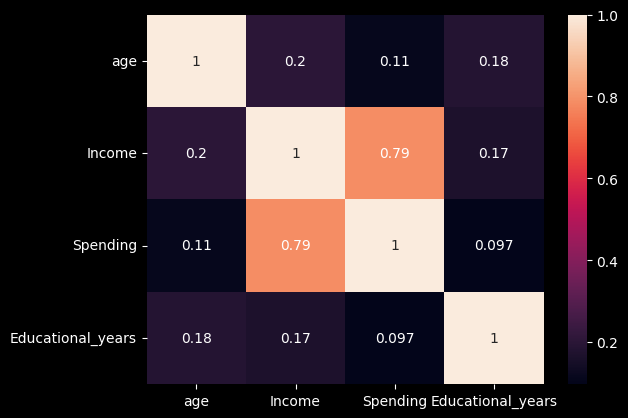

In [34]:
sns.heatmap(df[['age', 'Income', 'Spending', 'Educational_years']].corr(), annot = True)

In [35]:
df

,age,Income,Spending,Marital_Situation,Has_child,Educational_years,Education
0,54,84835.0,1190,Alone,No,12,Graduation
1,63,57091.0,577,Alone,No,12,Graduation
2,66,67267.0,251,Couple,Yes,12,Graduation
3,57,32474.0,11,Couple,Yes,12,Graduation
4,35,21474.0,91,Alone,Yes,12,Graduation
...,...,...,...,...,...,...,...
2234,48,66476.0,689,Alone,Yes,21,PhD
2235,47,31056.0,55,Couple,Yes,8,2n Cycle
2236,48,46310.0,309,Alone,Yes,12,Graduation
2237,46,65819.0,1383,Couple,No,12,Graduation


In [36]:
px.histogram(df[['Income', 'Education']], x = 'Education', y = 'Income',
             histfunc = 'avg')

###### Average Income for PhD looks similar to Master, but we can verify later with a statistical test if they are statistical different.

In [37]:
df.head()

,age,Income,Spending,Marital_Situation,Has_child,Educational_years,Education
0,54,84835.0,1190,Alone,No,12,Graduation
1,63,57091.0,577,Alone,No,12,Graduation
2,66,67267.0,251,Couple,Yes,12,Graduation
3,57,32474.0,11,Couple,Yes,12,Graduation
4,35,21474.0,91,Alone,Yes,12,Graduation


In [38]:
reg = LinearRegression()
fig = go.Figure(data = go.Scatter(x = df['Spending'], y = df['Income'],
                mode = 'markers'))

fig.update_traces()
fig.show()

##### Spending seems positively correlated with income level

##### need to statistically test it